#BINFA TP5: simulations de neurones

##Exercice 1 : Modèle de Hodgkin-Huxley

Le modèle de Hodgkin-Huxley modélise le potentiel de membrane d'un neurone par un circuit électrique équivalent dont les équations sont les suivantes :
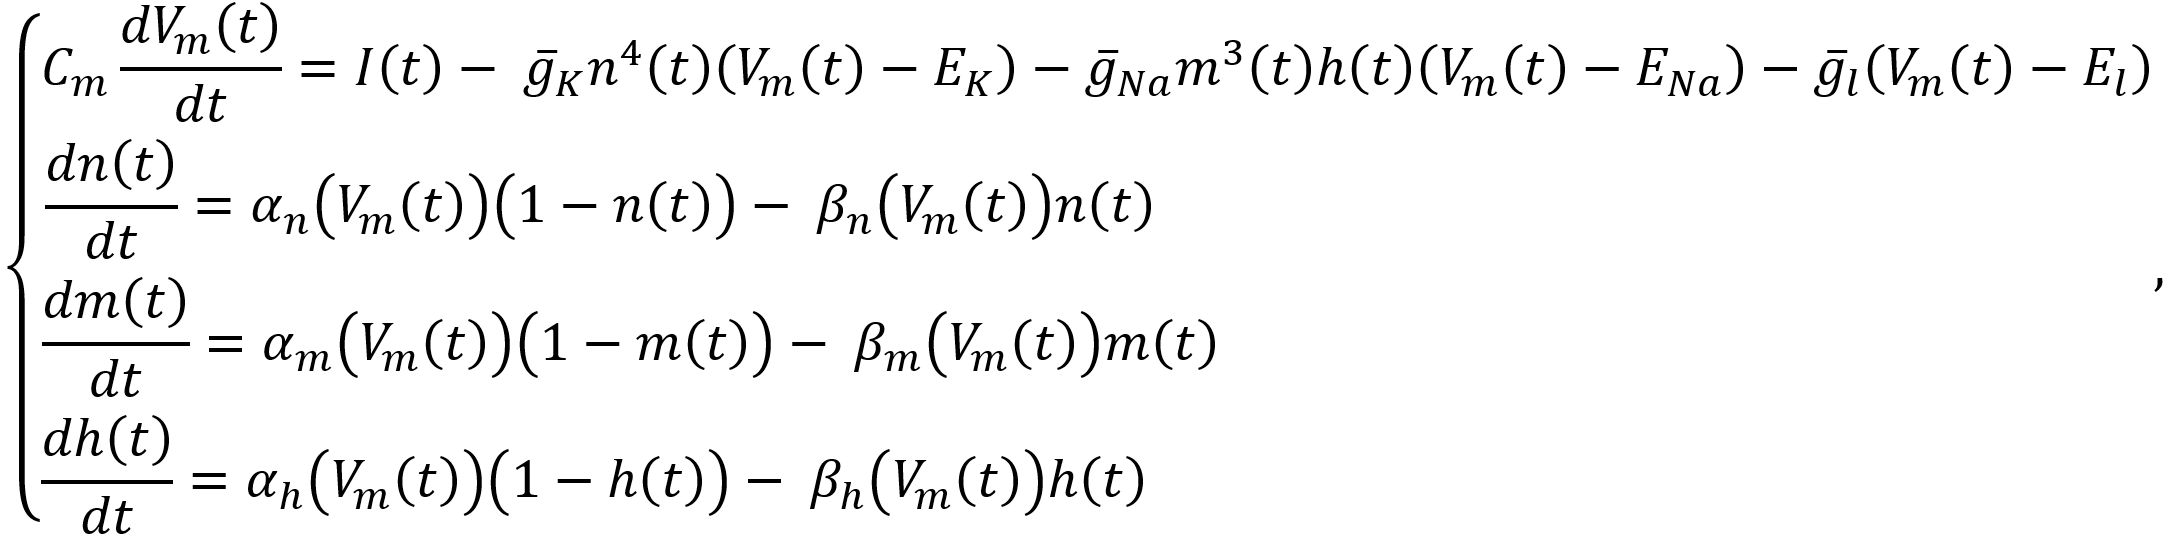

Où $C_m$ est la capacitance de la membrane, $I$ un courant injecté, ${\bar{g}}_X$ est la conductance maximal du canal pour l'ion $X$, $E_X$ le potentiel de repos induit par l'ion $X$ (Na+, K+, l (=leak)). Et les fonctions :

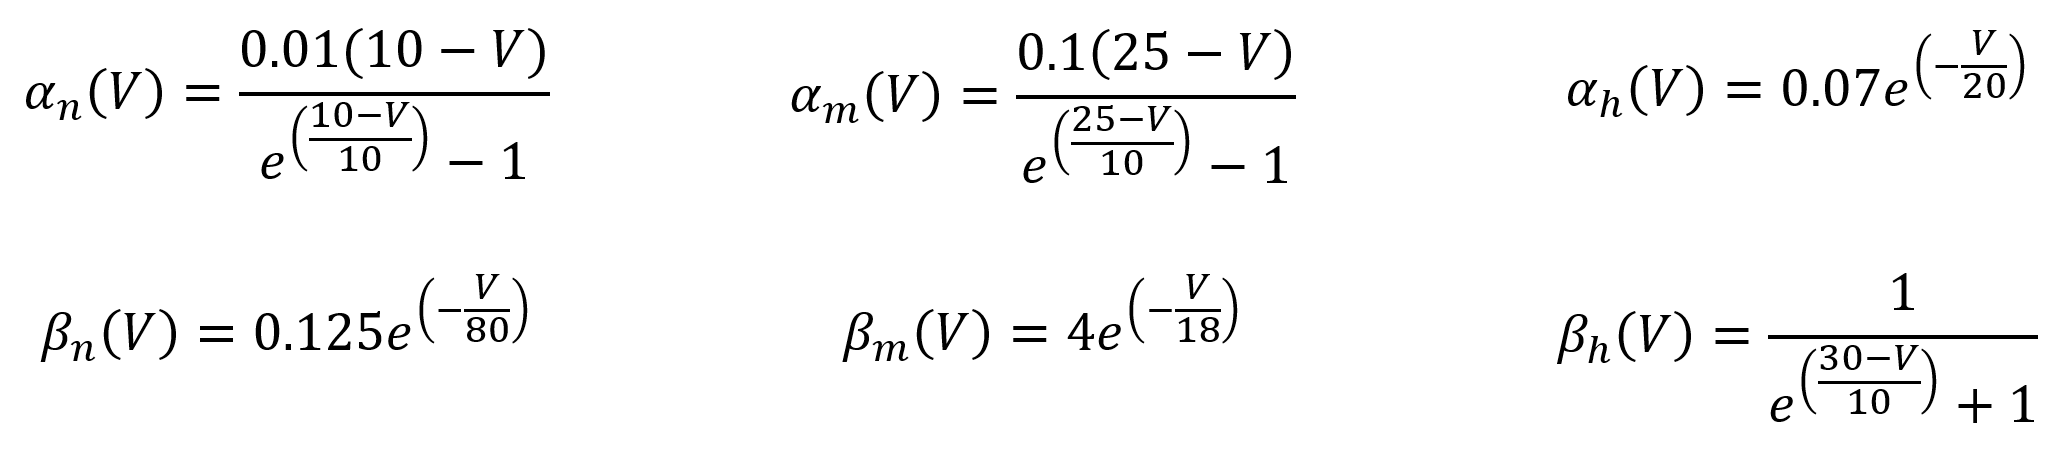


En utilisant les paramètres suivants : $C_m=1$, $g_{Na}= 100$, $g_K=5$, $g_l=0.3$, $E_{Na}=115$, $E_K=-35$, $E_l=10.6$, $∆t=0.001$ sec, $t_max=0.2$ sec et $v(0)=[-65,0,0,0]$. On utilisera $I(t)=0$.

**Question 1** : Affichez le potentiel de membrane en fonction du temps en simulant le système via la fonction solve_ivp de scipy.integrate en utilisant le schéma d'intégration RK45.

In [ ]:
print("Votre code ici !")

**Question 2** : Affichez l'évolution des variables $m,n,h$ en fonction du temps sur un autre graphique.

**Exercice 2 : modèle Leaky Integrate and Fire (LIF)**
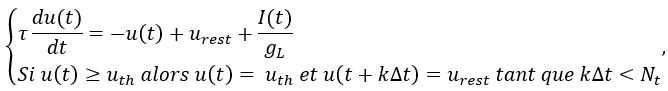

Où $u(t)$ est le potentiel de membrane (en millivolts) du neurone au temps $t$, $u_{th}$ est le potentiel de seuil (en millivolts) au-delà duquel le neurone émet un potentiel d'action, $u_{rest}$ est le potentiel de repos du neurone (en millivolts), $g_L$ est la conductance de fuite (en milli Siemens), $I(t)$ est le courant reçu par le neurone (en ampères) au temps $t$, $\tau$ est la constante de temps de membrane (en ms) et $N$ est la durée de la période réfractaire (en nombre de pas de temps $\Delta t$).

Dans ce modèle, quand $u$ dépasse la valeur seuil $u_th$ alors la valeur de $u$ est forcée à $u_{th}$ au temps où cela se produit et à $u_{rest}$ pour les $N$ pas de temps suivants.

**Question 1** Dynamique sous le seuil

Pour cette section, on se restreint au cas où $u(t) < u_{th}$, on considère donc uniquement la première équation. Dans le cas ou $I(t)=I$ est une constante, ici on prend I=0, cette équation peut se résoudre analytiquement (assez simplement) et on obtient :

$u(t) = u_{rest} + \Delta u \times e^{-\frac{t}{\tau}}$

En considérant les paramètres suivants $\tau=10$ ms, $u_{rest}=-65$ mV, $g_L=10$ mS, $\Delta t=1$e-4 s, $\Delta u=5$ mV, $t_{max}=0.1$ sec.

Affichez le potentiel de membrane $u(t)$.

In [ ]:
print("Votre code ici !")

**Question 2** Dans cet exercice, on utilisera différentes fonctions modélisant le courant d'entrée:

In [ ]:
def I1(t):
  if type(t) == "float":
    return 0
  return np.zeros(t.shape)

def I2(t):
  return 10 * (np.abs(np.round(np.sin(t/(0.1/2/np.pi)), 5)) < 1e-5) * (t > 0)

def I3(t):
  return 0.11 * (np.abs(np.round(np.sin(t/(0.2/2/np.pi)), 5)) > 0.96)

def I4(t):
  return 0.12 * (np.abs(np.round(np.sin(t/(0.2/2/np.pi)), 5)) > 0.96)

def I5(t):
  return (signal.sawtooth(t*2*np.pi*15, 1) + 1) / 2 * 0.12



Affichez ces différentes fonctions.

In [ ]:
print("Votre code ici !")

**Question 3** Simulation de la dynamique générale

On se place maintenant dans le cas général où on considère les deux équations (données au début de l'exercice). A cause de la seconde équation introduisant une discontinuité on ne peut plus résoudre analytiquement le système. A la place, on va le simuler en utilisant la méthode d'Euler.

En considérant les paramètres suivants Vous pouvez tester votre code avec les valeurs de paramètres suivantes : $\tau=10$ ms, $u_{th}=-55$ mV, $u_{ref}=-65$ mV, $g_L=10$ mS, $N_t=30$ ms, $\Delta t=1e-4$ s, $u(0)=-60$ mV, $t_{max}=1$ sec.

Affichez le potentiel de membrane $u(t)$ obtenu par votre simulation pour chacune des fonction I définies ci-dessus.

In [ ]:
print("Votre code ici !")

**Question 4** Détection des potentiels d'action

Etant donné $u$ un $array$ contenant des valeurs de potentiel de membrane au cours du temps, $ts$ les temps correspondant à ces valeurs et $u_th$ une valeur de seuil, affichez sur les simulations par des * les temps auxquels ont été générés les potentiels d'action. Appliquez ça pour chacune des fonction I définies ci-dessus.

In [ ]:
print("Votre code ici !")

**Question 5** Temps entre potentiels d'actions

Etant donné $u$ un $array$ contenant des valeurs de potentiel de membrane au cours du temps, $ts$ les temps correspondant à ces valeurs et $u_th$ une valeur de seuil, affichez l'histogramme des temps entre deux potentiels d'action pour chacune des fonction I définies ci-dessus.

In [ ]:
print("Votre code ici !")

**Question 6** En considérant une fonction I constante I(t) = I$, faites des simulations en augmentant I.
1. A partir de quelle valeur observe-t-on des potentiels d'action?
2. Affichez le temps moyen entre deux potentiels d'action en fonction de I. Qu'observez-vous?

In [ ]:
print("Votre code ici !")

**Question 7** Raster plot

Pour visualiser plus simplement les résultats pour beaucoup de neurones différents, on ne va plus afficher le potentiel de membrane de chacun mais uniquement quand ils émettent un potentiel d'action. On aura alors le temps en $x$, le numéro du neurone (= au numéro de la simulation) en $y$ et on affichera un point si le neurone $i$ a émis un potentiel d'action au temps $t$.

Affichez un raster plot pour 50 neurones avec les paramètres ci-dessus et I(t) = 400$.

In [ ]:
print("Votre code ici !")

**Question 8** Simulation stochastique

On va maintenant ajouter une composante aléatoire au modèle pour apporter de la variabilité au comportement du neurone. Votre fonction doit simuler le système suivant avec l'algorithme de Euler-Maruyama :

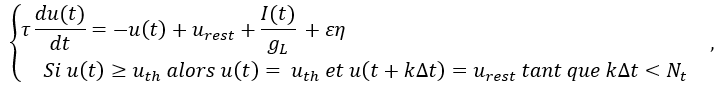

Ou $\epsilon$ est l'amplitude du bruit (en millivolts) et $\eta \sim N(0,1)$ est une variable aléatoire distribuée selon une loi normale de moyenne 0 et variance 1.

En utilisant les paramètres suivants Vous pouvez tester votre code avec les valeurs de paramètres suivantes : $\tau =10$ ms, $u_{th}=-55$ mV, $u_{ref}=-65$ mV, $g_L=10$ mS, $N_t=30$ ms, $\Delta t= 1$e-4 s, $u(0)=-60$ mV, $\epsilon=10$ mV, $t_{max}=1$ sec.

Affichez pour chacune des fonction I définies ci-dessus, sur le même graphique les résultats de 50 simulations.

In [ ]:
print("Votre code ici !")